Memory growth must be set at program startup
             High        Low       Open      Close    Volume  Adj Close  \
Date                                                                      
2010-06-29  25.00  17.540001  19.000000  23.889999  18766300  23.889999   
2010-06-30  30.42  23.299999  25.790001  23.830000  17187100  23.830000   
2010-07-01  25.92  20.270000  25.000000  21.959999   8218800  21.959999   
2010-07-02  23.10  18.709999  23.000000  19.200001   5139800  19.200001   
2010-07-06  20.00  15.830000  20.000000  16.110001   6866900  16.110001   

                100ma  
Date                   
2010-06-29  23.889999  
2010-06-30  23.860000  
2010-07-01  23.226666  
2010-07-02  22.220000  
2010-07-06  20.998000  


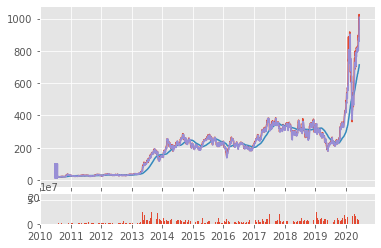

In [323]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
import tensorflow as tf
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized
            print(e)
solve_cudnn_error()

style.use('ggplot')

df = pd.read_csv('tsla.csv', parse_dates=True, index_col=0)
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
print(df.head())
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax1.plot(df.index, x['predicted'])
ax2.bar(df.index, df['Volume'])

plt.show()

In [328]:
#import tensorflow as tf
# function to create training data by shifting the music data 
import numpy as np
def create_train_dataset(df, look_back, train=True):
    dataX1, dataY1 = [],[]
    for i in range(len(df)-look_back-1):
        dataX1.append(df.iloc[i : i + look_back].values)
        if train:
            dataY1.append(df.iloc[i + look_back])
    return np.array(dataX1), np.array(dataY1)

def create_dataframe(df,array):
    new_df = df
    print(new_df.shape)
    new_df['predicted'] = array
    #new_df[:] = array
    #new_df.iloc[:,0] = array
    return new_df

df_Adj_Close = df['Adj Close']
pd100ma = df['100ma']
print(pd100ma.head())
X1, y1 = create_train_dataset(df_Adj_Close, look_back=21, train=True)

Date
2010-06-29    23.889999
2010-06-30    23.860000
2010-07-01    23.226666
2010-07-02    22.220000
2010-07-06    20.998000
Name: 100ma, dtype: float64


In [329]:
#print(X1)
#for i in y1:
#    print(i)
#print(y1)
#pd100ma.to_numpy()
X1 = X1.reshape((-1, 1, 21))
#X2 = X2.reshape((-1, 1, 3))
#test1 = test1.reshape((-1, 1, 3))
#test2 = test2.reshape((-1, 1, 3))

In [313]:
from tensorflow.keras.layers import Dense, LSTM, LeakyReLU
from tensorflow.keras.models import Sequential, load_model
# LSTM Model for channel 1 of the music data
rnn1 = Sequential()
rnn1.add(LSTM(units=100, activation='relu', input_shape=(None, 21)))
rnn1.add(Dense(units=50, activation='relu'))
rnn1.add(Dense(units=25, activation='relu'))
rnn1.add(Dense(units=12, activation='relu'))
rnn1.add(Dense(units=1, activation='relu'))
rnn1.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])
#rnn1.compile(optimizer='adam', loss='mean_squared_error')
rnn1.fit(X1, y1, epochs=200, batch_size=64)

Train on 2485 samples
Epoch 1/200
2485/2485 [==============================] - 1s 205us/sample - loss: 13619.6919 - mae: 67.5573
Epoch 2/200
2485/2485 [==============================] - 0s 46us/sample - loss: 1131.2103 - mae: 16.6362
Epoch 3/200
2485/2485 [==============================] - 0s 46us/sample - loss: 703.0615 - mae: 13.2072
Epoch 4/200
2485/2485 [==============================] - 0s 45us/sample - loss: 748.9894 - mae: 13.2715
Epoch 5/200
2485/2485 [==============================] - 0s 46us/sample - loss: 470.9371 - mae: 11.0651
Epoch 6/200
2485/2485 [==============================] - 0s 46us/sample - loss: 391.6582 - mae: 10.3947
Epoch 7/200
2485/2485 [==============================] - 0s 46us/sample - loss: 329.4348 - mae: 9.3944
Epoch 8/200
2485/2485 [==============================] - 0s 48us/sample - loss: 310.3609 - mae: 9.2920
Epoch 9/200
2485/2485 [==============================] - 0s 47us/sample - loss: 292.9614 - mae: 8.9747
Epoch 10/200
2485/2485 [=================

In [314]:
pred_rnn1 = rnn1.predict(X1.reshape(-1, 1, 21))

In [152]:
#for each in pred_rnn1:
#    print(each)

In [317]:
#print(pred_rnn1.shape)
#x=[1,2]
reshaped = pred_rnn1.reshape(-1)
reshaped += 0
y = np.asarray([100,100,10,100,100,100,10,100,100,100,10,100,100,100,10,100,100,100,10,100,100,100])
reshaped=np.concatenate((y,reshaped))
#print(reshaped.shape)
#reshaped = np.append(reshaped, [100,100,10,100,100,100,10,100,100,100,10,100,100,100,10,100,100,100,10,100,100,100])

In [322]:
x = create_dataframe(df,reshaped)
print(x)

(2507, 8)
                   High         Low        Open        Close    Volume  \
Date                                                                     
2010-06-29    25.000000   17.540001   19.000000    23.889999  18766300   
2010-06-30    30.420000   23.299999   25.790001    23.830000  17187100   
2010-07-01    25.920000   20.270000   25.000000    21.959999   8218800   
2010-07-02    23.100000   18.709999   23.000000    19.200001   5139800   
2010-07-06    20.000000   15.830000   20.000000    16.110001   6866900   
...                 ...         ...         ...          ...       ...   
2020-06-08   950.000000  909.159973  919.000000   949.919983  14174700   
2020-06-09   954.440002  923.929993  940.010010   940.669983  11388200   
2020-06-10  1027.479980  982.500000  991.880005  1025.050049  18563400   
2020-06-11  1018.960022  972.000000  990.200012   972.840027  15916500   
2020-06-12   987.979980  912.599976  980.000000   935.280029  16730200   

              Adj Close    

In [331]:
x = X1[0]
x = np.asarray(x)
x = x.reshape(1,1,21)
predict = rnn1.predict(x)
for i in range(10):
    #print(x)
    for j in range(20):
        x[0][0][j] = x[0][0][j+1]
    x[0][0][20] = predict
    predict = rnn1.predict(x)
    print(predict)

[[0.11455971]]
[[0.11455968]]
[[0.11455968]]
[[0.1145597]]
[[0.11455971]]
[[0.1145597]]
[[0.11455971]]
[[0.1145597]]
[[0.1145597]]
[[0.1145597]]
